# About This Notebook

Mushrooms classification project is a machine learning problem where the goal is to predict whether a mushroom is edible or poisonous based on its features. The dataset contains information about the physical characteristics and features of the mushrooms, such as cap shape, cap surface, cap color, gill size and color, stalk shape, and stalk root, among others.

In this project, I tackled the task of classifying mushrooms into either edible or poisonous based on their features. I started by preprocessing the data to clean it. This was followed by Exploratory Data Analysis (EDA) to uncover patterns, relationships, and correlations in the data. This helped inform the feature selection and model building process.

To build models that can accurately predict the class of a mushroom, I employed several machine learning algorithms including Logistic Regression, Decision Trees, Random Forests, Support Vector Classification, and Neural Networks. The performance of each model was evaluated using metrics such as accuracy, Classification Report, and Confusion Matrix.

The best model was then selected based on its performance and was used to make predictions on new data. This project was a great opportunity to improve my skills in machine learning, data cleaning, EDA, and model building. It was also a fun and educational experience that shed light on the characteristics of mushrooms.

# 1) Importing the Required libraries

In [1]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
#remove future warnings
import warnings
warnings.filterwarnings("ignore")


# 2) Reading data and data info

In [2]:
train_df = pd.read_csv("/kaggle/input/should-i-eat-this-mushroom-tfug-delhi/train.csv")
test_df = pd.read_csv("/kaggle/input/should-i-eat-this-mushroom-tfug-delhi/test.csv")

In [3]:
train_df.shape,test_df.shape 

((8124, 23), (2000, 23))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
train_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
test_df.head()

,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,c,f,f,f,c,b,b,...,k,w,w,p,w,o,e,w,v,m
1,1,b,f,n,t,l,f,c,b,n,...,y,c,w,p,w,t,e,w,s,g
2,2,f,f,n,f,n,f,w,n,u,...,s,w,w,p,w,o,e,w,n,d
3,3,x,y,p,f,s,f,c,b,p,...,s,w,w,p,w,t,e,n,v,p
4,4,f,y,y,f,l,f,w,b,b,...,s,o,w,p,w,o,e,n,v,d


# 3) Data Pre-Processing

### This code is using the LabelEncoder class from scikit-learn's preprocessing module to encode the categorical variables in a DataFrame called "train_df".

* The LabelEncoder object is created and stored in the 'le' variable.
* A for loop is used to iterate over all the columns in the "train_df" DataFrame.
* For each column, the "fit_transform" method is applied on the column to fit the encoder to the unique values in the column and then transform the column to integers.
* The transformed column is assigned back to the same column in the "train_df" DataFrame.
* This code will encode all the categorical variables in the "train_df" DataFrame, transforming them from strings to integers. This is useful in many machine learning algorithms, as they often expect numerical input data.

In [7]:
#preprocessing data for training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train_df.columns:
    train_df = train_df.apply(le.fit_transform)

In [8]:
# preprocessing data for testing
le = LabelEncoder()
for col in test_df.columns:
    test_df = test_df.apply(le.fit_transform)

In [9]:
# split data into X and Y
dfX = train_df.iloc[:,1:]
dfY = train_df['class']
dfX.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


# 4)  Exploratory Data Analysis (EDA)

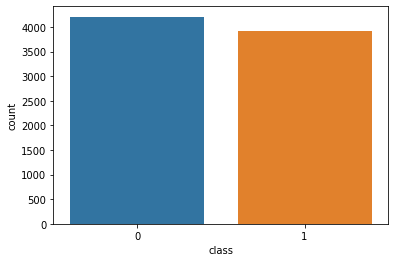

In [10]:
# visualize the training data 
sns.countplot(x='class',data=train_df)
plt.show()

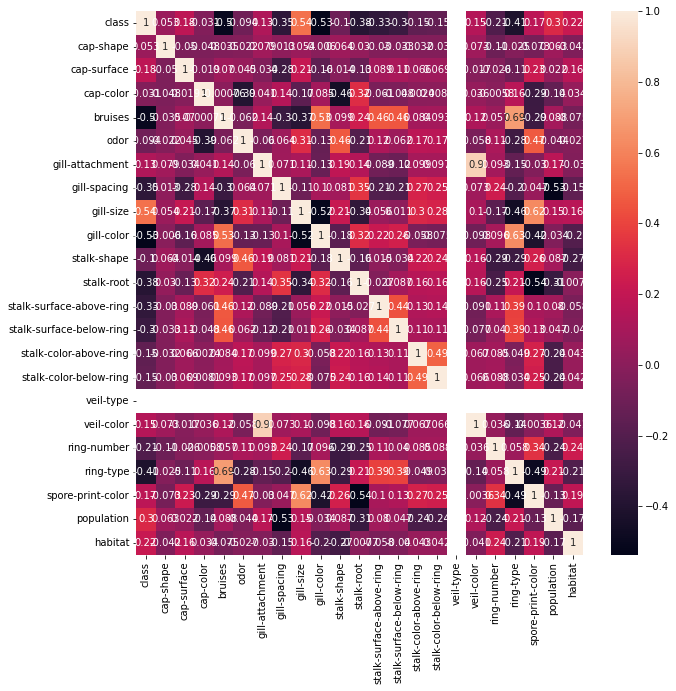

In [11]:
# heatmap for correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

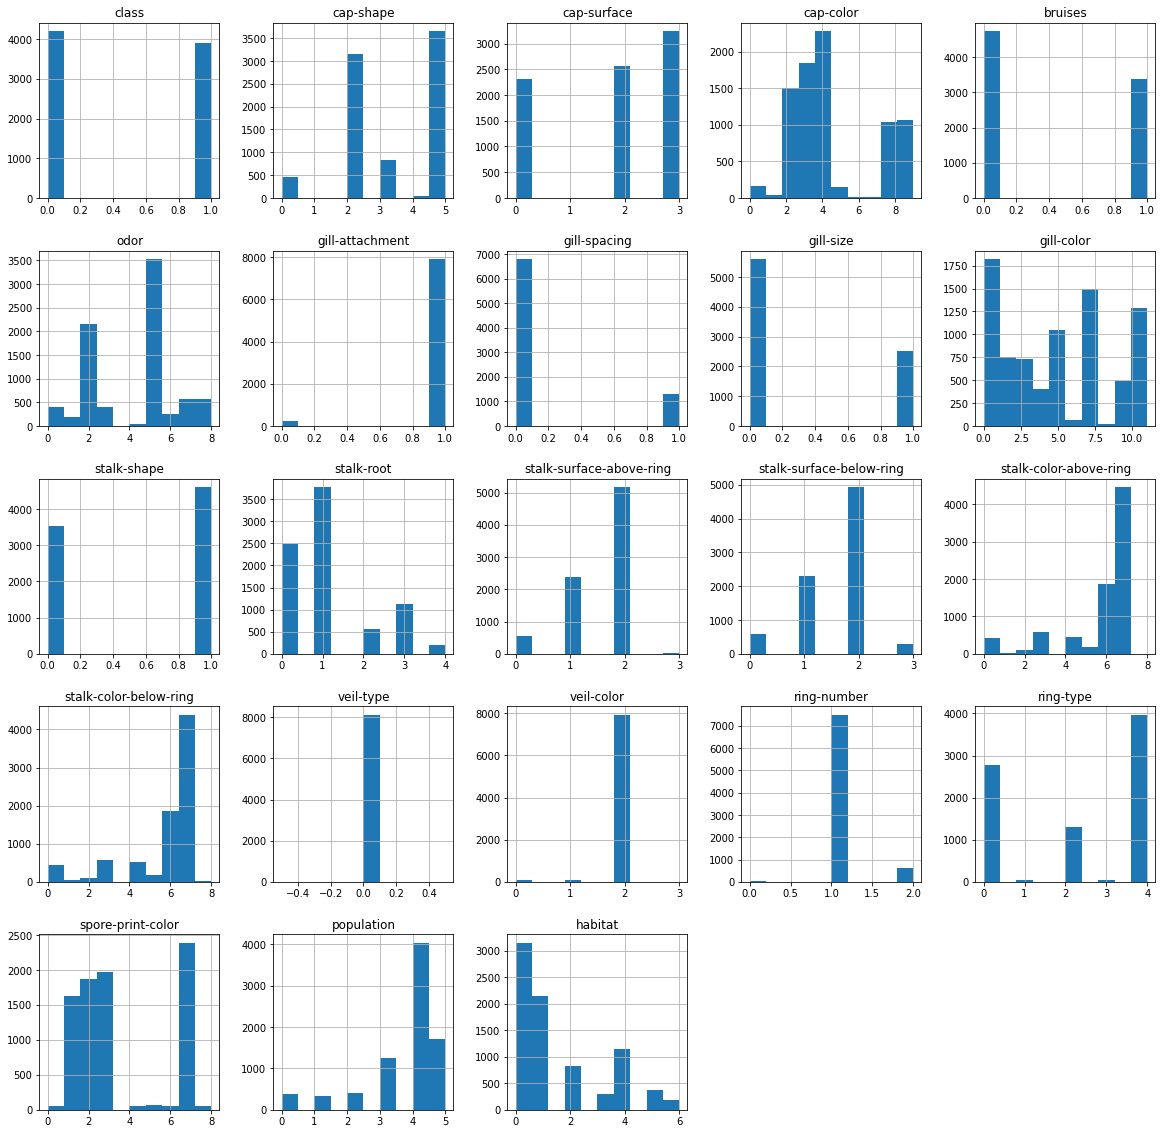

In [12]:
# plot all the features in the training data
train_df.hist(figsize=(20,20))
plt.show()

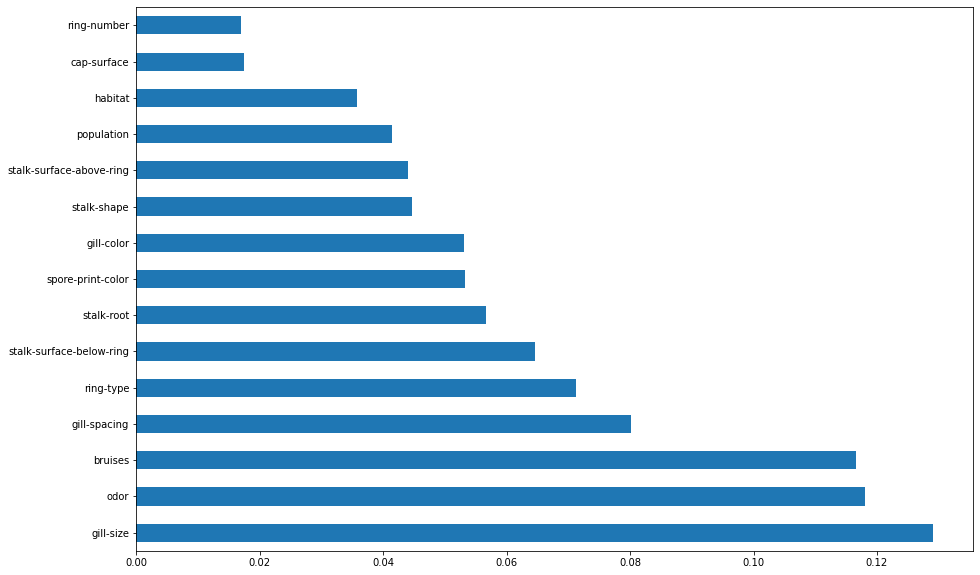

In [13]:
#plot the feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(dfX,dfY)
# print(model.feature_importances_)
plt.figure(figsize=(15,10))
feat_importances = pd.Series(model.feature_importances_, index=dfX.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

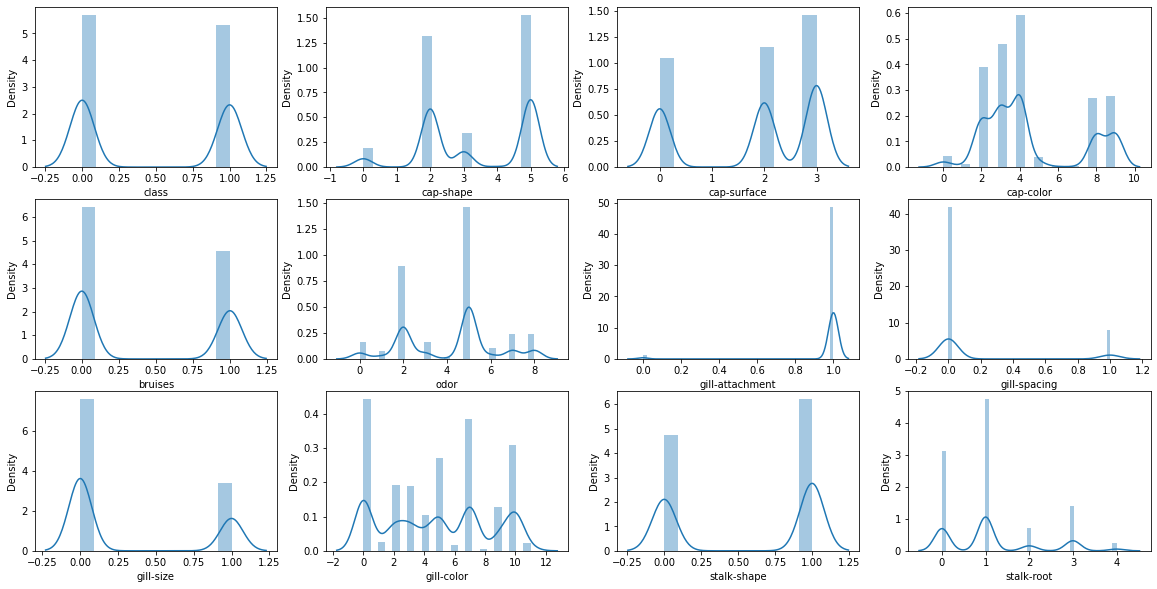

In [14]:
# plot the distribution of the features
plt.figure(figsize=(20,10))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    sns.distplot(train_df[train_df.columns[i]],kde=True)
plt.show()

# 5) Model Training 

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
skf = KFold(n_splits=5, shuffle=True)

### I defines a custom function trainwith to evaluate the accuracy of a machine learning model.

* The input to the function is a model name (e.g. SVC, MLPClassifier, etc.).
* The function uses StratifiedKFold cross-validation method (skf.split(dfX, dfY)) to split the data into training and testing sets _train and _test.
* For each fold, the model is fit on the training data (modelname.fit(dfX.iloc[_train],dfY.iloc[_train])) and used to predict the target values for the test data (ypred = modelname.predict(dfX.iloc[_test])).
* The confusion matrix is visualized using a heatmap (sns.heatmap(confusion_matrix(dfY.iloc[_test],ypred), annot=True, fmt='d', cmap='Greens',cbar=False)).
* The classification_report and accuracy_score functions are used to generate a report of the model performance, including accuracy.
* The average accuracy of the model over all folds is calculated and stored in a dictionary accurecy_report with the model name as the key.

In [16]:
# custom function for model accuracy report
accurecy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        sns.heatmap(confusion_matrix(dfY.iloc[_test],ypred), annot=True, fmt='d', cmap='Greens',cbar=False)
        plt.show()
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accurecy_report[str(modelname)] = round(np.array(model_accurecy).mean()*100,2)    

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression 
> Logistic Regression is a type of generalized linear model that is often used for binary classification problems. It is based on the idea of using a logistic function to model the probability of a target variable being one of two classes, given a set of predictors.

==========================using model: LogisticRegression(max_iter=1000) =========================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



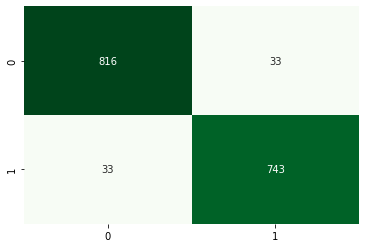

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       849
           1       0.96      0.96      0.96       776

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



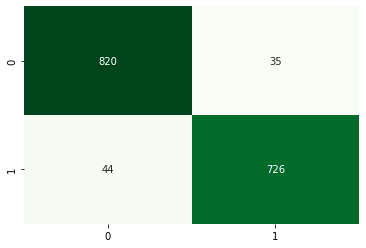

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       855
           1       0.95      0.94      0.95       770

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



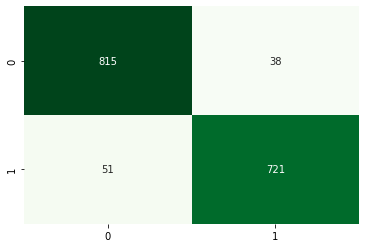

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       853
           1       0.95      0.93      0.94       772

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



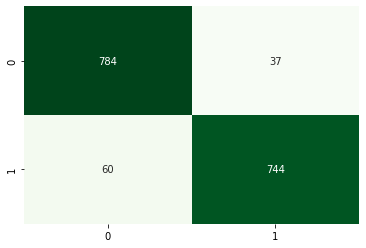

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       821
           1       0.95      0.93      0.94       804

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



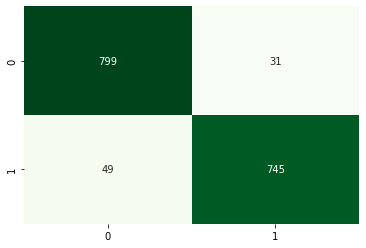

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       830
           1       0.96      0.94      0.95       794

    accuracy                           0.95      1624
   macro avg       0.95      0.95      0.95      1624
weighted avg       0.95      0.95      0.95      1624

The average accurecy of this model is 94.94%


In [18]:
logReg = LogisticRegression(max_iter=1000)
logReg.fit(dfX, dfY)
trainwith(logReg)

## SVC (Support Vector Classification)
> SVC is a linear model for binary classification, it finds the hyperplane that maximizes the margin between the two classes.

========================================using model: SVC() ========================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



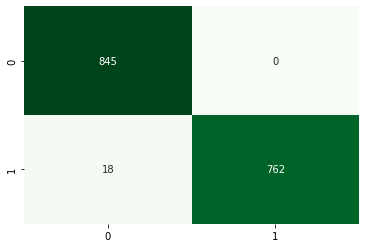

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       845
           1       1.00      0.98      0.99       780

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



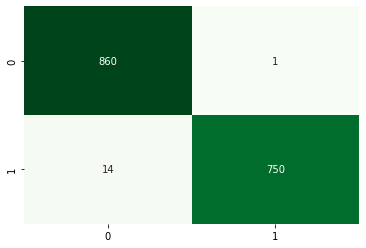

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       861
           1       1.00      0.98      0.99       764

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



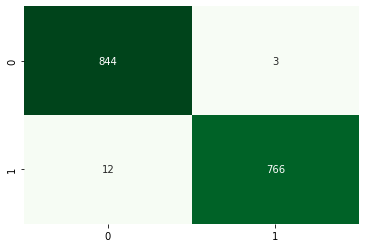

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       847
           1       1.00      0.98      0.99       778

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



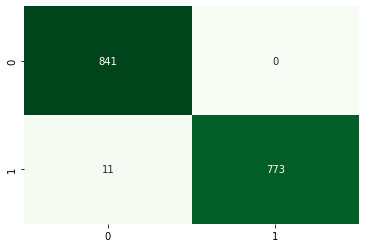

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       841
           1       1.00      0.99      0.99       784

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



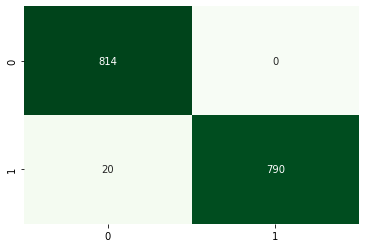

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       814
           1       1.00      0.98      0.99       810

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

The average accurecy of this model is 99.03%


In [19]:
svc_model = SVC()
svc_model.fit(dfX, dfY)
trainwith(svc_model)

## MLPClassifier (Multilayer Perceptron Classifier)
> MLPClassifier is a neural network model for multi-class classification. It has an input layer, one or more hidden layers and an output layer.

===================================using model: MLPClassifier() ==================================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



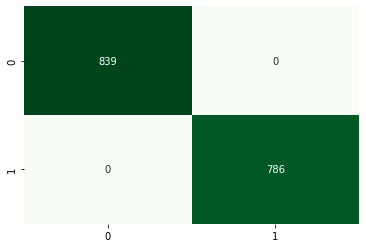

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00       786

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



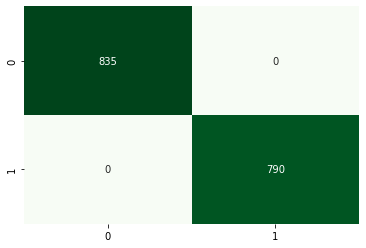

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       790

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



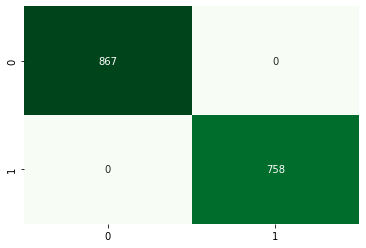

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       867
           1       1.00      1.00      1.00       758

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



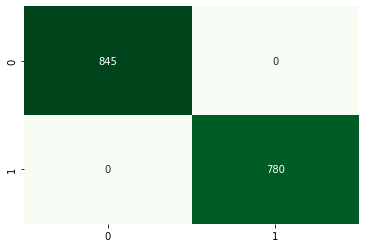

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



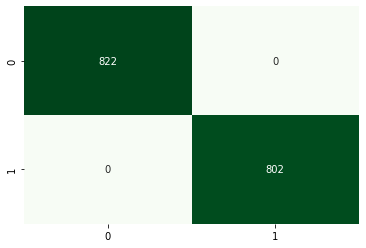

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [20]:
nlp_model = MLPClassifier()
nlp_model.fit(dfX, dfY)
trainwith(nlp_model)

## KNeighborsClassifier
> KNeighborsClassifier is a non-parametric method for classification. It uses the K nearest neighbors of a sample to predict its class.

================================using model: KNeighborsClassifier() ================================ 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



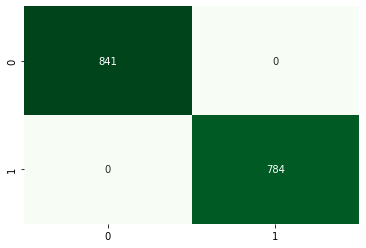

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



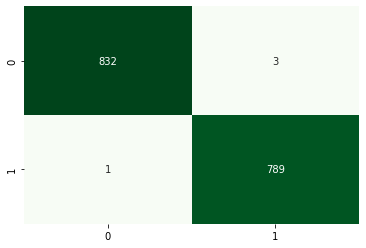

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       790

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



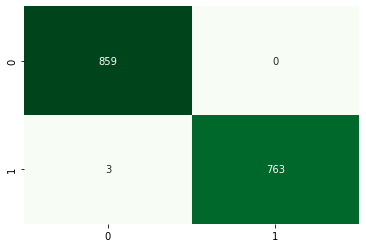

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       766

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



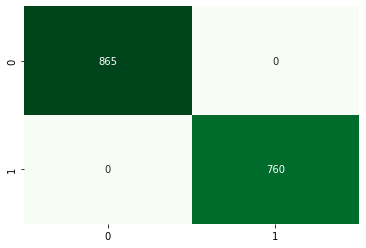

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



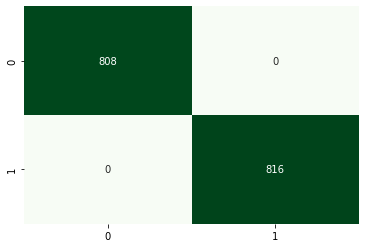

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       816

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 99.91%


In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(dfX, dfY)
trainwith(knn_model)

## RandomForestClassifier
> RandomForestClassifier is an ensemble learning method for classification. It builds multiple decision trees and aggregates their results to improve the accuracy and prevent overfitting.

===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



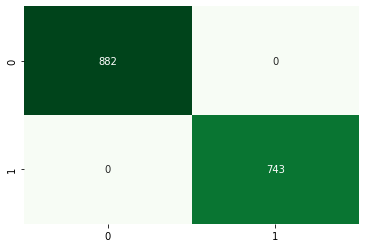

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       882
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



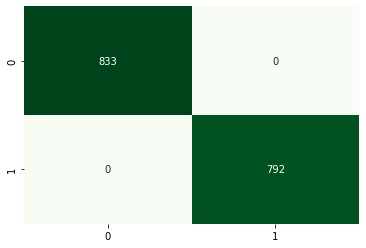

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



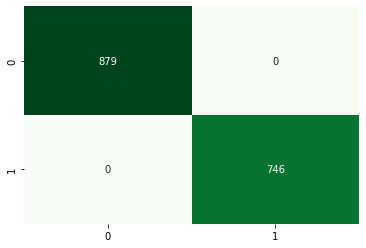

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       879
           1       1.00      1.00      1.00       746

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



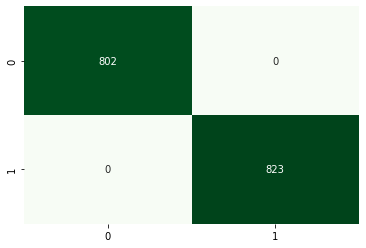

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       823

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



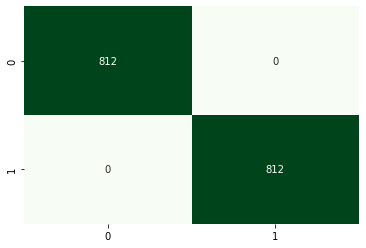

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       812
           1       1.00      1.00      1.00       812

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(dfX, dfY)
trainwith(rf_model)

## DecisionTreeClassifier
> DecisionTreeClassifier is a tree-based model for classification. It uses a tree structure to recursively split the data based on feature values until the samples in each leaf node belong to the same class.

===============================using model: DecisionTreeClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



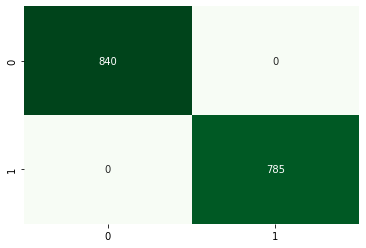

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



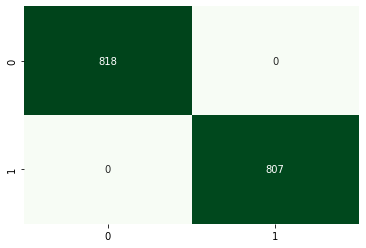

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       807

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



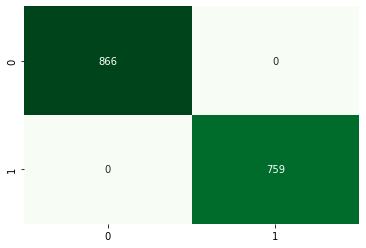

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



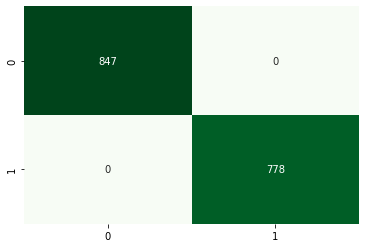

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00       778

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



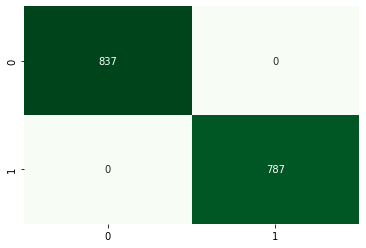

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [23]:
dt_model = DecisionTreeClassifier()
dt_model.fit(dfX, dfY)
trainwith(dt_model)

In [24]:
accurecy_report

{'LogisticRegression(max_iter=1000)': 94.94,
 'SVC()': 99.03,
 'MLPClassifier()': 100.0,
 'KNeighborsClassifier()': 99.91,
 'RandomForestClassifier()': 100.0,
 'DecisionTreeClassifier()': 100.0}

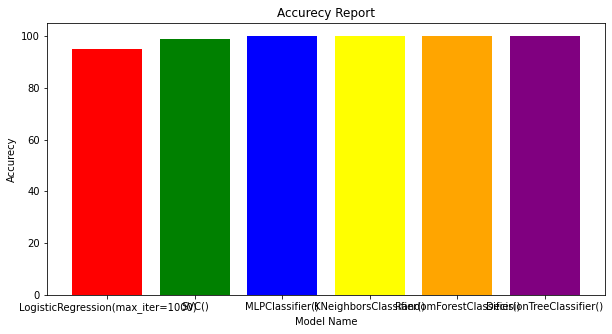

In [25]:
#plot the accurecy report
plt.figure(figsize=(10,5))
plt.bar(accurecy_report.keys(), accurecy_report.values(), color=['red','green','blue','yellow','orange','purple'])
plt.title('Accurecy Report')
plt.xlabel('Model Name')
plt.ylabel('Accurecy')
plt.show()

In [26]:
#GET THE ALL BEST MODEL
best_model = [k for k,v in accurecy_report.items() if v == max(accurecy_report.values())]
print(f'The best model is {best_model} with accurecy of {max(accurecy_report.values())}%')

The best model is ['MLPClassifier()', 'RandomForestClassifier()', 'DecisionTreeClassifier()'] with accurecy of 100.0%


# 6) Make predictions and submit (classification models)

In [27]:
test_df = test_df.drop(['index'], axis=1)

In [28]:
#use all model on test data
logReg_pred = logReg.predict(test_df)
svc_pred = svc_model.predict(test_df)
nlp_pred = nlp_model.predict(test_df)
knn_pred = knn_model.predict(test_df)
rf_pred = rf_model.predict(test_df)
dt_pred = dt_model.predict(test_df)

In [29]:
#read the sample submission file
sample_submission = pd.read_csv('/kaggle/input/should-i-eat-this-mushroom-tfug-delhi/sample_submission.csv')
sample_submission.head()

,index,class
0,0,e
1,1,e
2,2,e
3,3,e
4,4,e


# 7)Prediction Submission
> change predicted data and submit all other models predictions

In [30]:
# #change the prediction 0 and 1 to e and p
# sample_submission['class'] = logReg_pred
# sample_submission['class'] = sample_submission['class'].map({0:'e',1:'p'})
# #save the file
# sample_submission.to_csv('submission.csv', index=False)
# sample_submission.head()

# 8) Prediction Using Neural Neywork
Here I creates a Sequential model using the Keras library in Python for building deep learning models. The model is built using LSTM (Long Short-Term Memory) layers.

1. The first LSTM layer has 64 units and takes a time series data with 22 time steps and 1 feature as input, and returns sequences.
1. The following LSTM layers have decreasing number of units and also return sequences.
1. The Flatten layer is added to convert the 2D data to 1D before passing it to a dense layer.
1. The last layer is a dense layer with 1 unit and 'sigmoid' activation function.
1. The model is compiled with 'binary_crossentropy' loss function and 'adam' optimizer and accuracy is monitored as a metric.

In [31]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Reshape

In [32]:
#use the model
model = Sequential()
model.add(Reshape((22, 1), input_shape=(22,)))
# model.add(LSTM(64, input_shape=(22,1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4, return_sequences=True))
model.add(LSTM(2, return_sequences=True))
model.add(LSTM(1, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-01-31 12:10:42.129453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 12:10:42.268186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 12:10:42.269115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 12:10:42.270843: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

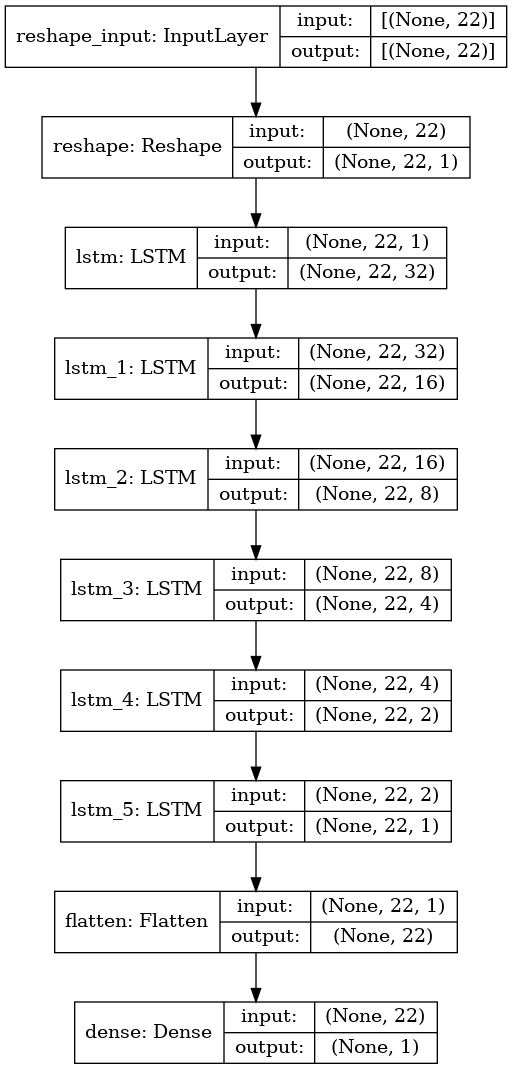

In [33]:
#show the neural network
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
# add callback to stop training when val_loss is not improving
callback = EarlyStopping(monitor='val_loss', patience=5)

In [35]:
#model training
history = model.fit(dfX, dfY, epochs=100, batch_size=10, verbose=1, validation_split=0.2, callbacks=callback)

2023-01-31 12:10:47.432764: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-31 12:10:54.853645: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


650/650 [==============================] - 20s 16ms/step - loss: 0.4729 - accuracy: 0.8086 - val_loss: 0.3183 - val_accuracy: 0.8954
Epoch 2/100
650/650 [==============================] - 8s 12ms/step - loss: 0.3346 - accuracy: 0.8677 - val_loss: 0.4263 - val_accuracy: 0.8222
Epoch 3/100
650/650 [==============================] - 9s 13ms/step - loss: 0.2530 - accuracy: 0.9101 - val_loss: 0.5386 - val_accuracy: 0.8055
Epoch 4/100
650/650 [==============================] - 9s 13ms/step - loss: 0.1964 - accuracy: 0.9357 - val_loss: 0.3801 - val_accuracy: 0.8597
Epoch 5/100
650/650 [==============================] - 8s 13ms/step - loss: 0.1504 - accuracy: 0.9514 - val_loss: 0.6873 - val_accuracy: 0.8092
Epoch 6/100
650/650 [==============================] - 8s 12ms/step - loss: 0.1212 - accuracy: 0.9640 - val_loss: 0.6367 - val_accuracy: 0.7920


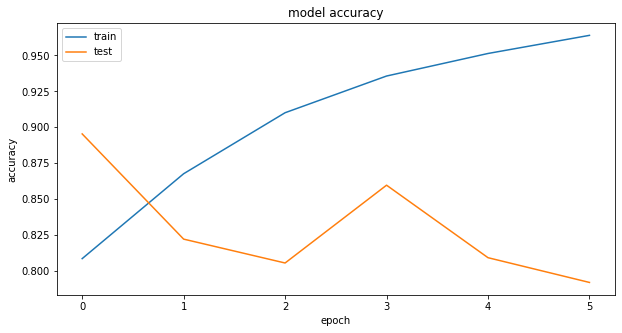

In [36]:
#plot the accurecy score of model
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# predict the test data
pred = model.predict(test_df)
pred = [1 if i > 0.5 else 0 for i in pred]
pred[:15]

[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]

In [38]:
# change the prediction 0 and 1 to e and p
sample_submission['class'] = pred
sample_submission['class'] = sample_submission['class'].map({0:'e',1:'p'})
# save the file
sample_submission.to_csv('submission.csv', index=False)

* If you find this helpful, I would really appreciate the upvote!

* If you see something wrong please let me know.

* And lastly Im happy to hear your thoughts about the notebook for me to also improve!